In [3]:
#!git clone https://github.com/seujung/KoGPT2-summarization.git

Cloning into 'KoGPT2-summarization'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 65 (delta 33), reused 46 (delta 18), pack-reused 0
Unpacking objects: 100% (65/65), 16.92 KiB | 866.00 KiB/s, done.


In [29]:
!pip install wandb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 1.9 MB 4.6 MB/s            
     |████████████████████████████████| 168 kB 105.1 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 182 kB 79.1 MB/s            
     |████████████████████████████████| 62 kB 2.7 MB/s             
     |████████████████████████████████| 140 kB 75.2 MB/s            
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=23348fe6a424decbe9e8043d38f208adfc94f6bf464cbec9ec52484c9bb4db86
  Stored in directory: /aiffel/.cache/pip/wheels/b7/0a/67/ada2a22079218c75a88361c0782855cc72aebc4d18d0289d05
Successfully built pathtool

In [1]:
!pip install kogpt2_transformers

In [4]:
tokenizer = get_kogpt2_tokenizer()

Downloading:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/109 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/577 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


In [27]:
# 스페셜 토큰화 예시

text ='#@주소# 여기로 오면된다.'
added_token_num = tokenizer.add_tokens(['#@시스템#사진#'])
added_token_num += tokenizer.add_special_tokens({"additional_special_tokens":["#@주소#"]'})
tok_text = tokenizer.tokenize(text, add_special_tokens=False)
print(tok_text)
input_ids = tokenizer.encode(text, add_special_tokens=False)
print(input_ids)
decoded_ids = tokenizer.decode(input_ids)
print(decoded_ids)
decoded_ids = tokenizer.decode(input_ids, skip_special_tokens=True)
print(decoded_ids)

['#@주소#', '▁여', '기로', '▁오면', '된다', '.']
[50127, 170, 868, 18382, 243, 47440]
#@주소# 여기로 오면된다.
여기로 오면된다.


In [3]:
import torch
import torch.nn as nn
from tqdm import tqdm
from torch.utils.data import Dataset
from kogpt2_transformers import get_kogpt2_model, get_kogpt2_tokenizer
import csv
import pandas as pd
from tqdm import tqdm
from datasets import Dataset
import re

In [4]:
%cd /aiffel/aiffel/aiffelthon/csv

/aiffel/aiffel/aiffelthon/csv


In [2]:
!ls

In [37]:
# torch cash 초기화
import gc
gc.collect()
torch.cuda.empty_cache()

In [55]:
# torch 1.8.1+cu111 설치
#!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 1982.2 MB 1.5 kB/s              █▍                | 954.2 MB 111.6 MB/s eta 0:00:10
     |████████████████████████████████| 17.6 MB 52.1 MB/s            
     |████████████████████████████████| 1.9 MB 4.8 MB/s            
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1+cu111
    Uninstalling torch-1.9.1+cu111:
      Successfully uninstalled torch-1.9.1+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1+cu111
    Uninstalling torchvision-0.10.1+cu111:
      Successfully uninstalled torchvision

Model : KoGPT-2

Parametors size : 

[How to use GPT2LMHeadModel for conditional generation](https://github.com/huggingface/transformers/issues/970)

Data NAME : Ai_hub 대화문 요약 Data Set

In [ ]:
# 메타 데이터 적용 함수
# 적용할 예정 
def metadata(data): 
    meta = '#'+data['Category']+'#'
    data['Text'] = meta + data['Text']

In [4]:
def data_load(data_path = '/aiffel/aiffel/aiffelthon/csv/train.tsv'):
    data = []
    train_df = pd.read_csv(data_path, delimiter = '\t')
    train_df = train_df.iloc[::4, :]
    train_df.reset_index(drop=True, inplace = True)
    # 스페셜 토큰 적용 예정
    # 전처리 적용 하고 
    # 메타데이터 삽입 예정
    train_df['Text'].tolist()
    train_df['Summary'].tolist()
    return train_df['Text'], train_df['Summary']

# def data_load_b(data_path = '/aiffel/aiffel/aiffelthon/csv/train.tsv'):
#     data = []
#     train_df = pd.read_csv(data_path, delimiter = '\t')
#     train_df = train_df.iloc[::4, :]
#     train_df.reset_index(drop=True, inplace = True)
#     train_df['Summary'].tolist()
#     return train_df['Summary']

def val_load(data_path = '/aiffel/aiffel/aiffelthon/csv/val.tsv'):
    val_df = pd.read_csv(data_path, delimiter = '\t')
    val_df = val_df.iloc[::4, :]
    val_df.reset_index(drop=True, inplace = True)
    val_df['Text'].tolist()
    val_df['Summary'].tolist()
    return val_df['Text'], val_df['Summary']

# def val_load_b(data_path = '/aiffel/aiffel/aiffelthon/csv/val.tsv'):
#     val_df = pd.read_csv(data_path, delimiter = '\t')
#     val_df = val_df.iloc[::4, :]
#     val_df.reset_index(drop=True, inplace = True)
#     val_df['Summary'].tolist()
#     return val_df['Summary']

In [11]:
train_df[train_df['Text'].str.contains(r'[#@]+[가-힣A-Za-z#]+')]

# Labeling이 포함된 Data는 총 107,390개이다.

,Text,Summary
0,"['그럼 날짜는 가격 큰 변동 없으면 6.28-7.13로 확정할까?', '우리 비행...","비행기 표 가격에 대해 이야기하며, 특가 이벤트를 기다리고 있다."
1,"['Kf마스크만 5부제 하는거지?', '응. 면마스크는 아무때나 사도될껀?', '면...",비염이 있어서 싸게 나온 일회용 부직포 마스크를 사두려고 한다.
7,"['취소함 ㅜㅜ 10만원 내고 돈아깝더라..', '헐 ㅜㅜ 그럼 동생하구 둘이서만 ...","항공권은 10만 원 내고 취소하고, 오늘 투어 예약을 하였다."
8,"['저기 어디야', '저기 시내 알라딘 상지알라딘에두 있삼 저거 내가 확인 다 했서...",알라딘에도 있고 고민만 많이 했고 결국 사지 못한 컵과 포토 티켓을 정리했다.
12,"['수분크림 201원에 사따 #@이모티콘# 개이듁', '201원? 개쩌넼ㅋㅋㅋ', ...",신한카드와 롯데카드 밖에 결제가 안된다고 해서 엄마의 신라 선불카드로 수분 크림을 ...
...,...,...
279977,['코엑스나 잠실 둘중에 한군데서 보자ㅎㅎ❤️ 몇시에볼까? 일찍 보자 했으니까 그럼...,드디어 내일 11시에 코엑스나 잠실에서 만나기로 해서 너무 신난다.
279979,['애들아 우리 홍콩 d-53일이다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ디데이로...,계획된 홍콩 여행의 일정에 대해 이야기하고 있다.
279981,"['그럼 나 일단 #@이름# 쌤 7시 해놓을게', '응응 너는월욜에시간갠찮???',...",월요일에 같이 받고 돈가스 같은 간편하고 저렴한 저녁을 먹기로 한다.
279983,"['나랑 놀려고 핬구나?ㅠㅠㅠ', '네!!!! #@이름#보고 찌뻐서 ( ͡° ͜ʖ ...",3시 반부터는 시간이 나서 보고 싶은데 위염이 생겨서 안 된다.


In [5]:
# 데이터 전처리

def preprocess_sentence(sentence):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (.) 제거
    #sentence = re.sub(r'[#@]+[가-힣A-Za-z#]+', ' ', sentence) # Labeling 삭제
    sentence = re.sub(r'[ㄱ-ㅎㅏ-ㅣ.,?!]+[/ㄱ-ㅎㅏ-ㅣ.,?!]', '', sentence) # 여러개 자음, 모음, 구두점을 삭제한다.
    sentence = re.sub("[^가-힣a-z0-9-.,!?]", " ", sentence) # 지정한 문자 제외 공백으로 전환
    sentence = re.sub(r'[" "]+', " ", sentence) # 여러개 공백을 하나의 공백으로 바꿉니다.
    sentence = sentence.strip() # 문장 양쪽 공백 제거

    return sentence

In [10]:
# Model 제작

import torch
import torch.nn as nn
from torch.utils.data import Dataset
from kogpt2_transformers import get_kogpt2_model


class AbstractiveKoGPT2(nn.Module):
    def __init__(self):
        super(AbstractiveKoGPT2, self).__init__()
        self.kogpt2 = get_kogpt2_model()

    def generate(self,
                 input_ids,
                 do_sample=True,
                 max_length= 128,
                 top_p=0.92,
                 top_k=50,
                 temperature= 0.6,
                 no_repeat_ngram_size =None,
                 num_return_sequences=3,
                 early_stopping=False,
                 ):
        return self.kogpt2.generate(input_ids,
                                     do_sample=do_sample,
                                     max_length=max_length,
                                     top_p = top_p, # 글의 표현 범위 조절
                                     top_k = top_k, # 글의 표현 범위 조절
                                     temperature=temperature, # 글의 창의성 조절
                                     no_repeat_ngram_size= no_repeat_ngram_size,
                                     num_return_sequences=num_return_sequences,
                                     early_stopping = early_stopping,
                                     eos_token_id = 1,
                                     pad_token_id= 3
                                    )

    def forward(self, input, labels = None):
        if labels is not None:
            outputs = self.kogpt2(input, labels=labels)
        else:
            outputs = self.kogpt2(input)

        return outputs

In [26]:
# 학습용 데이터 세트 제작

class AbstrativeDataset(Dataset):
    def __init__(self,
                 #n_ctx = 1024, 
                 n_ctx = 512, 
                 texts_max_length = 256,
                 summary_max_length = 128,
                 device = 'cpu'
                 ):
        
        self.data =[]
        self.device = device
        self.tokenizer = get_kogpt2_tokenizer()

        bos_token_id = [self.tokenizer.bos_token_id] # , 0
        eos_token_id = [self.tokenizer.eos_token_id] # , 1
        pad_token_id = [self.tokenizer.pad_token_id] # , 3

        datas = data_load()

        for texts, text_sum in tqdm(zip(datas[0],datas[1])):
            text = texts
            abstractive_summary = text_sum

#             tmp_str =''
#             for article in articles:
#                 tmp_str += article

            # encode
            # truncate, if string exceed max length
            enc_tmp_str = self.tokenizer.encode(text, truncation= True, max_length=texts_max_length)
            enc_abstractive_summary = self.tokenizer.encode(abstractive_summary, truncation= True, max_length=summary_max_length)
            
            #  요약할 문장  요약된 문장 
            index_of_words = bos_token_id + enc_tmp_str+ eos_token_id + enc_abstractive_summary + eos_token_id
            pad_token_len = n_ctx - len(index_of_words)
            index_of_words += pad_token_id * pad_token_len
            #print(f'max: {max(index_of_words)}, min: {min(index_of_words)}')
            
            # RuntimeError: CUDA error: device-side assert triggered
            if max(index_of_words)<50000:
                self.data.append(torch.tensor(index_of_words).to(device))

    def __len__(self):
        return len(self.data)

    def __getitem__(self,index):
        item = self.data[index]
        return item

In [23]:
# 데이터 셋이 제대로 만들어졌는지 확인 완료
len(data_1)

52474

In [67]:
# 데이터 셋이 제대로 만들어지지 않은 경우
len(dataset)

0

In [27]:
# 검증용 데이터 세트 제작
class EvalAbstrativeDataset(Dataset):
    def __init__(self,
                 device,
                 tokenizer,
                 #n_ctx = 1024,
                 n_ctx = 512,
                 data_path = '/aiffel/aiffel/aiffelthon/csv/val.tsv',
                 texts_max_length = 256,
                 summary_max_length = 128,
                 ):
        #self.data = pd.DataFrame()
        self.data =[]
        self.tokenizer = tokenizer
        print(device)
        
        bos_token_id = [self.tokenizer.bos_token_id] # 
        eos_token_id = [self.tokenizer.eos_token_id] # 

        #json_datas = json_load(data_path=data_path)
        #eval_datas = data_load(data_path=data_path)
        datas = val_load()
        
        for data in tqdm(datas[0]):
            #id = dict_data['id']
            texts = data

            tmp_str =''
            for text in texts:
                tmp_str += text

            # encode
            # truncate, if string exceed max length
            enc_tmp_str = self.tokenizer.encode(tmp_str, truncation= True, max_length=texts_max_length)

            #  요약할 문장  요약된 문장 
            index_of_words = bos_token_id + enc_tmp_str+ eos_token_id

            self.data.append({
                #'id':id,
                'input':torch.tensor([index_of_words]).to(device)
            })

    def __len__(self):
        return len(self.data)

    def __getitem__(self,index):
        item = self.data[index]
        return item

device:  cuda


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
69998it [00:32, 2127.27it/s]
100%|██████████| 1/1 [2:10:22<00:00, 7822.85s/it]


,loss
0,3.6712


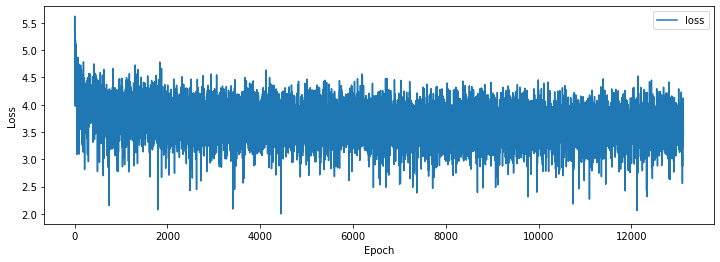

In [42]:
# train

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from torch.utils.data import dataloader
import random
#import wandb

def set_seed(seed = 42):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    
if __name__ == '__main__':
    
    set_seed()
    #wandb.init(project= 'bakbak', entity= 'quarter2000', name= f'KG')
    checkpoint_path ="/aiffel/aiffel/aiffelthon/checkpoint/"
    save_ckpt_path = f"{checkpoint_path}/kogpt2-abstractive.pth"

    n_epoch = 1         # Num of Epoch
    batch_size = 4      # 배치 사이즈
    device = "cuda" if torch.cuda.is_available() else "cpu"
    #device = 'cpu'
    print('device: ',device)
    save_step = 2000 # 학습 저장 주기
    learning_rate = 5e-5  # Learning Rate

    dataset= AbstrativeDataset(device=device)
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = AbstractiveKoGPT2()
    model.to(device)

    loss_fct = torch.nn.CrossEntropyLoss(ignore_index=3)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    total_losses = []
    losses =[]

    if os.path.isfile(save_ckpt_path):
        checkpoint = torch.load(save_ckpt_path, map_location=device)
        pre_epoch = checkpoint['epoch']
        pre_loss = checkpoint['loss']
        total_losses = checkpoint['losses']

        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

        print(f"load pretrain from: {save_ckpt_path}, epoch={pre_epoch}, loss={pre_loss}")
        

    for epoch in tqdm(range(n_epoch)):
        count = 0
        with tqdm(total=len(train_loader), desc=f"Train({epoch})") as pbar:
            for i, data in enumerate(train_loader):
                optimizer.zero_grad()
#                 for d in data:
#                     print(max(d),min(d))
                outputs = model(data, labels=data)
                _, logits = outputs[:2]

                # Shift so that tokens < n predict n
                shift_logits = logits[..., :-1, :].contiguous()
                shift_labels = data[..., 1:].contiguous()

                loss = loss_fct(shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1))
                loss.backward()
                optimizer.step()

                losses.append(loss.item())

                if (count > 0 and count % save_step == 0) or (len(data) < batch_size):
                    torch.save({
                        'epoch': epoch,
                        'train_no': count,
                        'model_state_dict': model.state_dict(),
                        'optimizer_state_dict': optimizer.state_dict(),
                        'loss': loss,
                        'losses': losses
                    }, save_ckpt_path)
                count += 1
                pbar.update(1)
                #pbar.update(2000)
                pbar.set_postfix_str(f"Loss: {loss.item():.3f} ({np.mean(losses):.3f})")
                #if i%50==0:
                    #wandb.log({'loss':np.mean(losses)})

        total_losses.append(np.mean(losses))

    # data
    data = {
        "loss": total_losses
    }
    df = pd.DataFrame(data)
    display(df)

    # graph
    plt.figure(figsize=[12, 4])
    plt.plot(losses, label="loss")
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

In [44]:
# test

tokenizer = get_kogpt2_tokenizer()
ckpt_path = '/aiffel/aiffel/aiffelthon/checkpoint/kogpt2-abstractive.pth'
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

eval_datas = EvalAbstrativeDataset(tokenizer=tokenizer,device=device,data_path='/aiffel/aiffel/aiffelthon/csv/val.tsv')

checkpoint = torch.load(ckpt_path,map_location=torch.device(device))
model = AbstractiveKoGPT2()
model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

model.eval()

my_summaries=[]
# for data in tqdm(eval_datas[:3337]):
#     input_ids = data['input']
#     sample_output = model.generate(input_ids=input_ids,max_length=1024)
#     summary = tokenizer.decode(sample_output[0].tolist()[len(input_ids[0]):-1])
#     summary = summary.replace('','').replace('','')
#     my_summaries.append(summary)

for data in tqdm(eval_datas):
    input_ids = data['input']
    max_toc = max(input_ids[0])
    min_toc = min(input_ids[0])
    if max_toc<50000:
        sample_output = model.generate(input_ids=input_ids,max_length=1024)
        summary = tokenizer.decode(sample_output[0].tolist()[len(input_ids[0]):-1])
        summary = summary.replace('','').replace('','')
        my_summaries.append(summary)
    else:
        summary = tokenizer.decode(input_ids[0])
        summary = summary.replace('','').replace('','').replace('','')
        my_summaries.append(summary)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


cuda
cuda


100%|██████████| 8751/8751 [49:08<00:00,  2.97it/s]  


In [45]:
type(my_summaries)

list

In [115]:
num = 6
print('Text : ', val_load()[0][num])
print('\n')
print('real_summarization : ', val_load()[1][num])
print('\n')
print('predict_summarization : ', my_summaries[num])

Text :  ['야그럼 금토일 9-5시야?', '헐랭이다,,', '3일?', '금토일', '야', '나 그리고 쳥일 이틀이나 삼일만 하는 알바 구해여겠다', '너근데 3일만하는데 90이면 나도 갈아타고 싶다']


real_summarization :  금토일 3일 하는 아르바이트비(아르바이트비)가 90이어서 부러워하고 있다.


predict_summarization :  금토일 9-5시에 일하고 일 이틀만 하는 아르바이트(알바)를 구한다.</s><pad><pad><pad><pad><pad><pad><pad>


In [74]:
!pip install rouge

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [75]:
from rouge import Rouge

In [114]:
# Rouge-Score 출력
num = 6
Reference =  val_load()[1][num]
Confernce = my_summaries[num]
rouge = Rouge()
rouge.get_scores(Reference, Confernce, avg=True)

{'rouge-1': {'r': 0.2222222222222222,
  'p': 0.2857142857142857,
  'f': 0.24999999507812506},
 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0},
 'rouge-l': {'r': 0.2222222222222222,
  'p': 0.2857142857142857,
  'f': 0.24999999507812506}}

In [111]:
print("ROUGE 1 SCORE: ",rouge.compute(predictions=my_summaries, references=val_load()[1], rouge_types=["rouge1"])["rouge1"].mid)
print("ROUGE 2 SCORE: ",rouge.compute(predictions=my_summaries, references=val_load()[1], rouge_types=["rouge2"])["rouge2"].mid)
print("ROUGE L SCORE: ",rouge.compute(predictions=my_summaries, references=val_load()[1], rouge_types=["rougeL"])["rougeL"].mid)

INFO:absl:Using default tokenizer.


ROUGE 1 SCORE:  Score(precision=0.04258041154097848, recall=0.09192446033378499, fmeasure=0.05172329688853834)


INFO:absl:Using default tokenizer.


ROUGE 2 SCORE:  Score(precision=0.008190391259222003, recall=0.018693101740753438, fmeasure=0.010211059049763202)


INFO:absl:Using default tokenizer.


ROUGE L SCORE:  Score(precision=0.042033012418152896, recall=0.09103680667787628, fmeasure=0.051098806441328)
